## Import packages and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer['data']
y = cancer['target']

In [4]:
X.shape

(569, 30)

In [5]:
#number of target = 1 samples, relatively balanced
np.mean(y)

0.6274165202108963

## Train Test Data Split (70/30)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=101)

## Default Values

In [7]:
gbc = GradientBoostingClassifier(random_state=0)

In [8]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
#Note the 100% training accuracy which is a sign of overfitting
print('Training Score: {:.2f}'.format(gbc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(gbc.score(X_test, y_test)))

Training Score: 1.00
Test Score: 0.95


In [10]:
pred = gbc.predict(X_test)

In [11]:
#8 wrong predictions out of 171 test samples
print(confusion_matrix(y_test, pred))

[[ 62   2]
 [  6 101]]


In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        64
           1       0.98      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



## Build a less complex model to avoid overfitting

In [13]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)

In [14]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
print('Training Score: {:.2f}'.format(gbc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(gbc.score(X_test, y_test)))

Training Score: 0.99
Test Score: 0.96


In [16]:
pred = gbc.predict(X_test)

In [17]:
#6 wrong predictions out of 171 test samples
print(confusion_matrix(y_test, pred))

[[ 61   3]
 [  3 104]]


## Decision Function and Predicted Probabilities

In [18]:
print('Predicted Probabilities:')
print(gbc.predict_proba(X_test)[:5])

Predicted Probabilities:
[[0.16715755 0.83284245]
 [0.97635471 0.02364529]
 [0.01443847 0.98556153]
 [0.10916657 0.89083343]
 [0.97546142 0.02453858]]


In [19]:
#negative value predicts 1st class, positive value predicts 2nd class; larger numbers indicate more confidence
print('Decision Function:')
print(gbc.decision_function(X_test)[:5])

Decision Function:
[ 1.60590771 -3.72066221  4.22331547  2.09928253 -3.68266424]


## Feature Importances

In [24]:
print('Feature Importances:')
print(gbc.feature_importances_)

Feature Importances:
[0.         0.00752841 0.         0.         0.         0.
 0.         0.19003816 0.         0.         0.         0.
 0.         0.03021517 0.00129074 0.         0.00462917 0.
 0.00395602 0.         0.00410581 0.02889633 0.23301698 0.17074334
 0.00147572 0.         0.00416148 0.31628218 0.00057021 0.0030903 ]


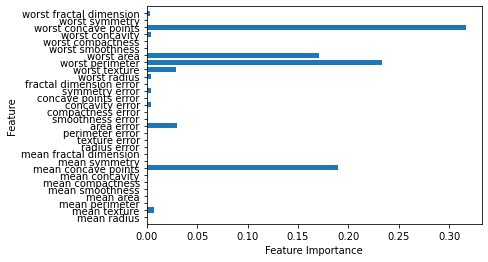

In [25]:
#a lot of features have 0 importance
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features);

## Alternative: Decrease learning rate to prevent overfitting

In [32]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbc.fit(X_train, y_train)
print('Training Score: {:.2f}'.format(gbc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(gbc.score(X_test, y_test)))
pred = gbc.predict(X_test)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Training Score: 0.99
Test Score: 0.93

Confusion Matrix:
[[ 58   6]
 [  6 101]]
